<a href="https://colab.research.google.com/github/amitmldlai/Impact-on-Linear-Models-under-different-conditions/blob/main/Behaviour_of_Linear_Model_on_Imbalanced_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier, LogisticRegression 
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# What if Data is imabalanced


1. We will look for how linear models work in case of imbalanced data.
2. How hyper plane is changs according to change in the learning rate.
4. We will create 4 different Datasets, in first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in 3rd its 100:40 and in 4th dataset its 100:80


Creating 2d imbalanced data points 

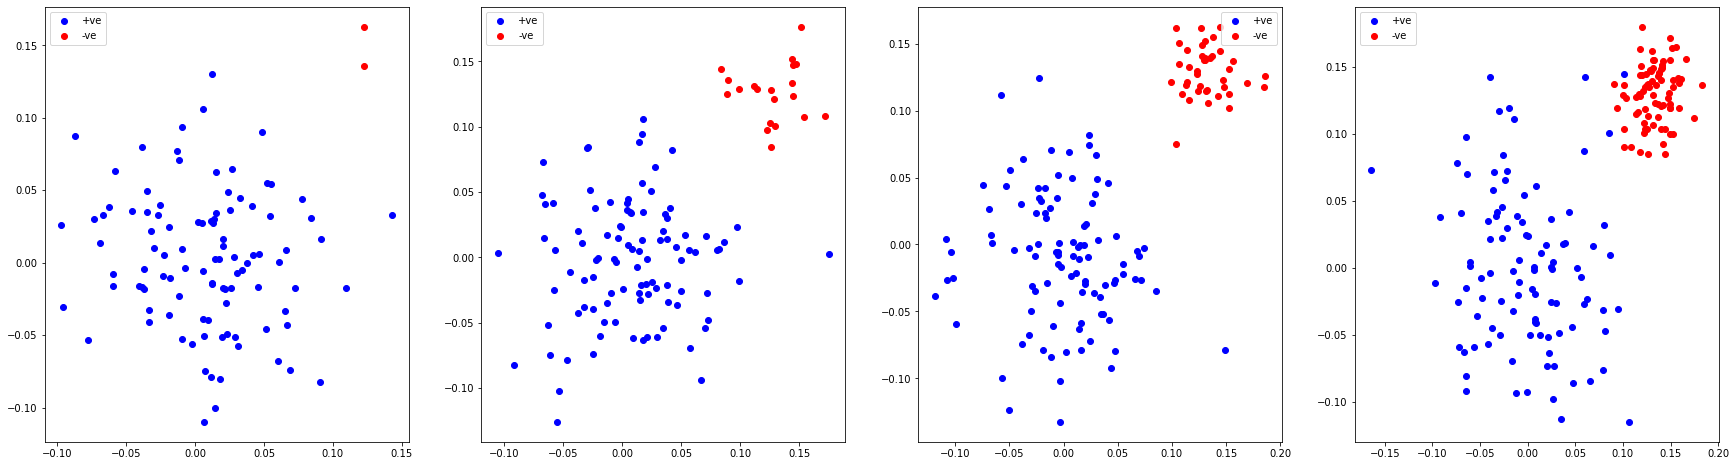

In [79]:
ratios = [(100, 2), (100, 20), (100, 40), (100, 80)]

plt.figure(figsize=(30, 8))
for figure_no, data in enumerate(ratios):
    plt.subplot(1, 4, figure_no+1)
    X_p = np.random.normal(0, 0.05, size = (data[0], 2))
    X_n = np.random.normal(0.13, 0.02, size = (data[1], 2))
    y_p = np.array([1]*data[0]).reshape(-1, 1)
    y_n = np.array([0]*data[1]).reshape(-1, 1)
    X = np.vstack((X_p, X_n))
    y = np.vstack((y_p, y_n))
    plt.scatter(X_p[:, 0], X_p[:, 1], color='blue', label = '+ve')
    plt.scatter(X_n[:, 0], X_n[:, 1], color='red', label = '-ve')
    plt.legend()   
plt.show()

**Utility function for hyperplane**

In [78]:
def draw_line(coef, intercept, y_min, y_max):    # to draw the hyper plane we are creating two points, for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    x_min = (-coef[0][1]*y_min - intercept)/coef[0][0] #  ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    x_max = (-coef[0][1]*y_max - intercept)/coef[0][0] #  ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points = np.array([[x_min, y_min], [x_max, y_max]])
    plt.plot(points[:, 0], points[:, 1], 'b--')

We will apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

#Using Logistic Regression

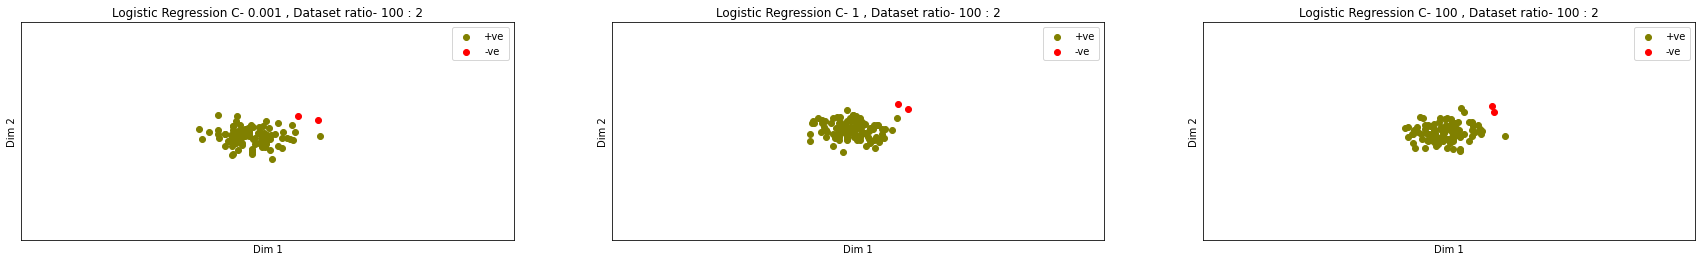

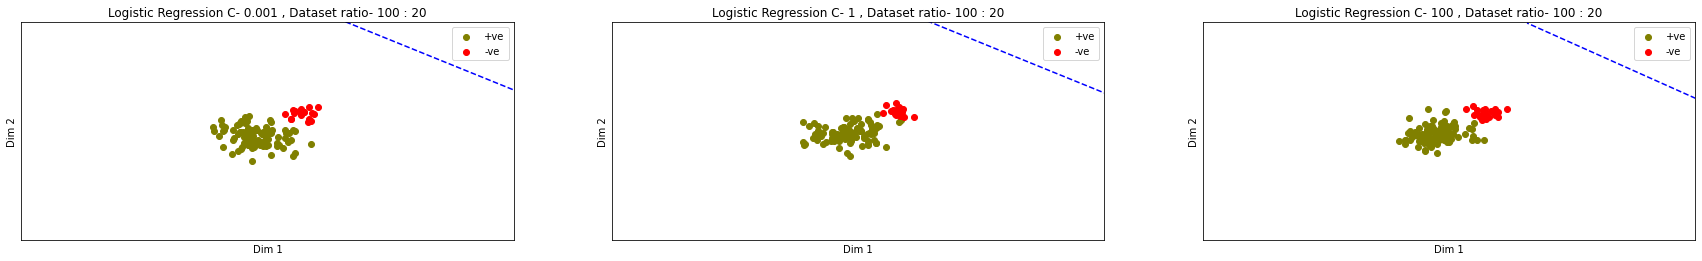

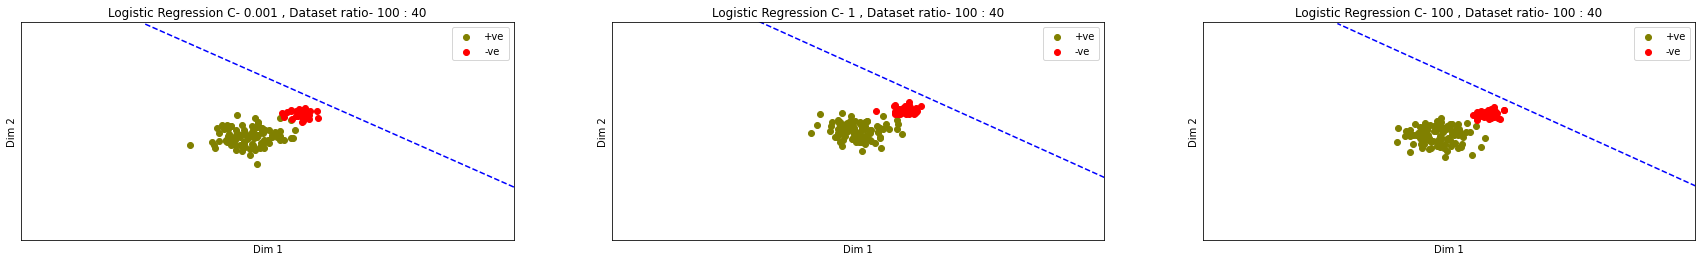

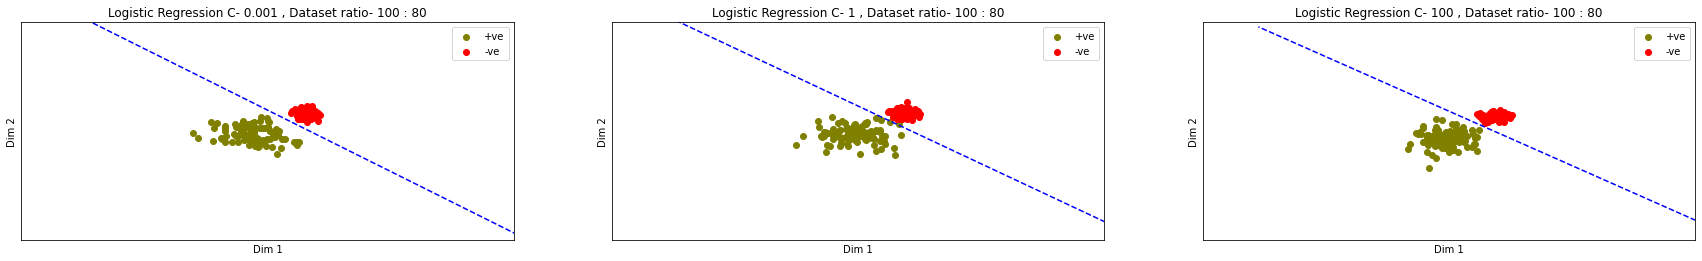

In [80]:
C = [0.001, 1, 100]

for idx, ratio in enumerate(ratios):
  
    # Generate Points
    plt.figure(figsize=(30, 4))
    for id, c in enumerate(C):
        plt.subplot(1, len(C), id + 1)
        xp = np.random.normal(0.0, 0.05, size=(ratio[0], 2))
        xn = np.random.normal(0.13, 0.02, size=(ratio[1], 2))
  
        # generate labels
        yp = np.array([1] * ratio[0]).reshape(-1, 1)
        yn = np.array([0] * ratio[1]).reshape(-1, 1)

        # build dataset
        X = np.vstack((xp, xn))
        Y = np.vstack((yp, yn))

        # Fiiting to Logistic Regression
        logistic_clf = LogisticRegression(penalty='l2', C=1.0,random_state=42, n_jobs=-1)
        logistic_clf.fit(X, Y)

        plt.title(f'Logistic Regression C- {c} , Dataset ratio- {ratio[0]} : {ratio[1]}')
        plt.scatter(xp[:, 0], xp[:, 1], color='olive', label = '+ve')
        plt.scatter(xn[:, 0], xn[:, 1], color='red', label = '-ve')
        plt.ylim(y_min, y_max)
        plt.xlim(x_min, x_max)
        plt.xticks(())
        plt.yticks(())
        plt.xlabel('Dim 1')
        plt.ylabel('Dim 2')
        plt.legend()

        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

        # plot decision boundary and margins
        draw_line(logistic_clf.coef_, logistic_clf.intercept_, y_min, y_max)

    plt.show()



**For C = 0.001** 


*   for Dataset 1 (100:2) and Dataset 2 (100:20) model is highly underfit.
*   for Dataset 3 (100:40) model is slightly underfit
*   for Dataset 4 (100:80) model is well fitted


**For C = 1**

*   for Dataset 1 (100:2) and Dataset 2 (100:20) model is highly underfit.
*   for Dataset 3 (100:40) model is slightly underfit
*   for Dataset 4 (100:80) model is well fitted


**For C = 100**
 

*   for Dataset 1 (100:2) model is slightly underfit.
*   for Dataset 2 (100:20) model is over-fitted
*   for Dataset 3 (100:40) model is over-fitted but lesser than model for C =0.001 and C = 1
*   for Dataset 4 (100:80) model is fitted well



*Overall we can see that for Logistic Regression, hyperparameter c does not help much in classifying the data points correctly,which shows LR gets impacted a lot by data imbalance and cannot be controlled by hyperparameter c.*




#Using SVM

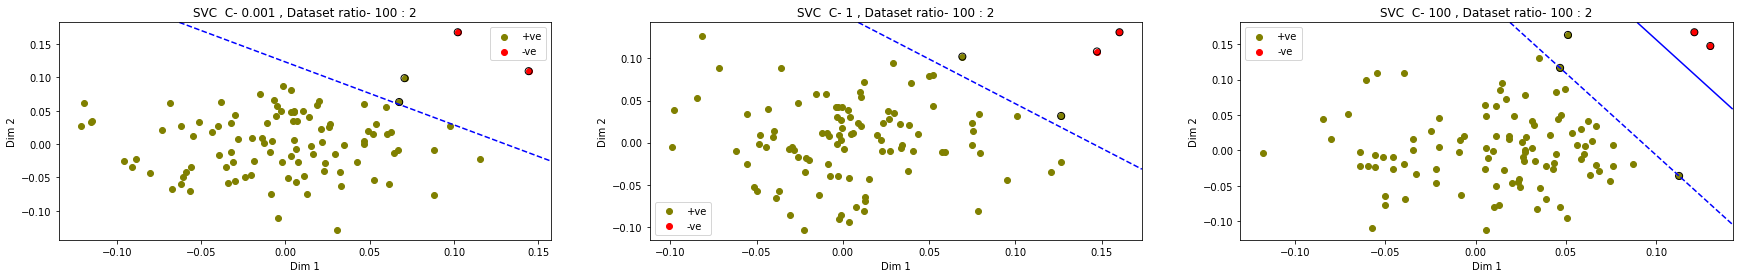

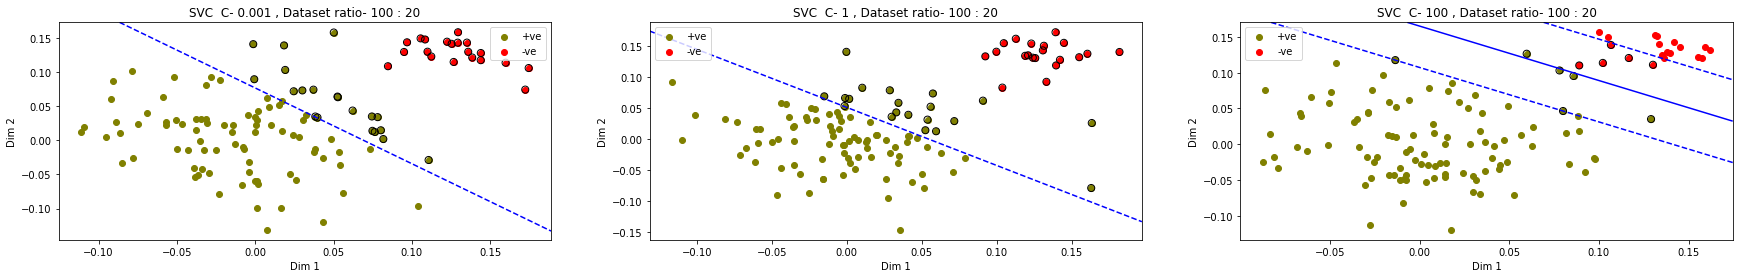

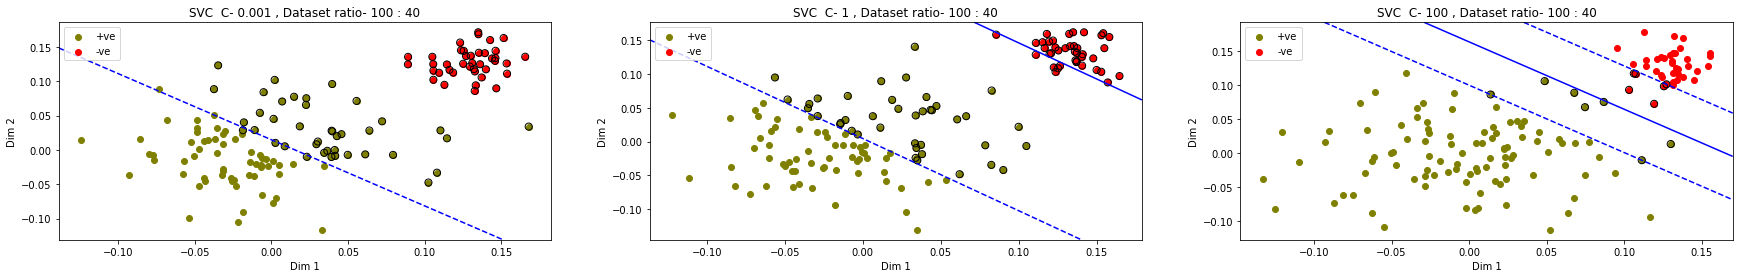

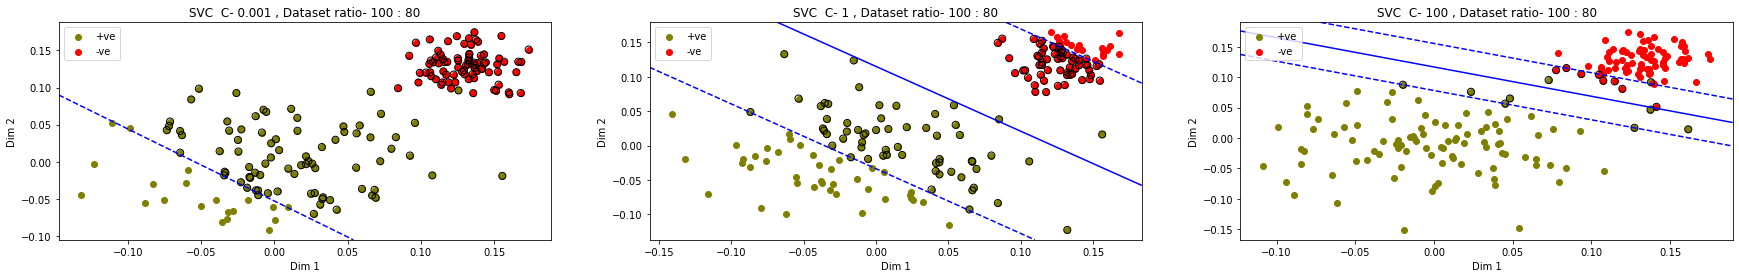

In [81]:
C = [0.001, 1, 100]

for idx, ratio in enumerate(ratios):

  # Generate Points
  plt.figure(figsize=(30, 4))
  for id, c in enumerate(C) :
    plt.subplot(1, len(C), id+1)
    xp = np.random.normal(0.0, 0.05, size=(ratio[0], 2))
    xn = np.random.normal(0.13, 0.02, size=(ratio[1], 2))

    # Generating labels
    yp = np.array([1]*ratio[0]).reshape(-1,1)
    yn = np.array([0]*ratio[1]).reshape(-1,1)
    
    # build dataset
    X = np.vstack((xp, xn))
    Y = np.vstack((yp, yn))
 
   # Fitting to SVM-Classfier
    svc_clf = SVC(C=c, kernel='linear')
    svc_clf.fit(X, Y)

    plt.title(f'SVC  C- {c} , Dataset ratio- {ratio[0]} : {ratio[1]}')
    plt.scatter(xp[:, 0], xp[:, 1], color='olive', label = '+ve')
    plt.scatter(xn[:, 0], xn[:, 1], color='red', label = '-ve')
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.legend()

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1])
    yy = np.linspace(ylim[0], ylim[1])
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svc_clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='blue', levels=[-1, 0, 1], alpha=1, linestyles=['--', '-', '--'])

    # plot support vectors
    ax.scatter(svc_clf.support_vectors_[:, 0], svc_clf.support_vectors_[:, 1], s=50, linewidth=1, facecolors='none', edgecolors='black')
  plt.show()



**For C = 0.001**

*   for Dataset 1 (100:2) model is under-fitted
*   for Dataset 2 (100:20) model is under-fitted than dataset 1
*   for Dataset 3 (100:40) model is more under-fitted than dataset 2
*   for Dataset 4 (100:80) model is by far most under-fitted


**For C = 1**

*   for Dataset 1 (100:2) model is under-fitted
*   for Dataset 2 (100:20) model is under-fitted than dataset 1
*   for Dataset 3 (100:40) model is more under-fitted than dataset 2
*   for Dataset 4 (100:80) model is highly under-fitted



**For C = 100**


*   for Dataset 1 (100:2) model is slightly under-fitted, but better than previous  c =0.01 and c=1
*   for Dataset 2 (100:20) model is fitted well
*   for Dataset 3 (100:40) model is very slightly over-fitted
*   for Dataset 4 (100:80) model is fitted well



*Overall we can see that for SVM, hyperparameter c does help in classifying the data points correctly,which shows SVM gets impacted less by data imbalance and can be controlled to good extent by hyperparameter c.*



